<a href="https://colab.research.google.com/github/IronZiiz/Data-Science_Time-Series/blob/main/Main_notebook_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
 import pandas as pd

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

In [28]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [29]:
# checando dimensão do conjunto de dadtos
df.shape

(17429, 10)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [31]:
# vendo se tem nulo ou não
df.isna().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [32]:
# Usando o metodo interpolate para preencher colunas com linhas NaN
df['temperatura'] = df['temperatura'].interpolate(method = 'linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method = 'linear')

In [33]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [34]:
# Verificando se temos dados duplicados
df.duplicated().sum()


15

In [35]:
# Quem são as duplicadas
duplicadas = df.duplicated(keep = False)

linhas_duplicadas = df[duplicadas]
linhas_duplicadas = linhas_duplicadas.sort_values(by = 'data_hora')
linhas_duplicadas

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [36]:
# removendo a duplicação e deixando em uma linha só
df_limpo = df.drop_duplicates()

In [37]:
df_limpo.shape

(17414, 10)

In [38]:
# Estatisticas descritivas
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

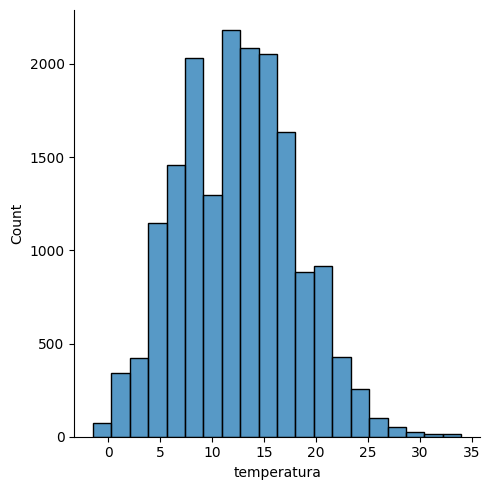

In [40]:
sns.displot(df_limpo, x = 'temperatura', bins = 20)
plt.show()

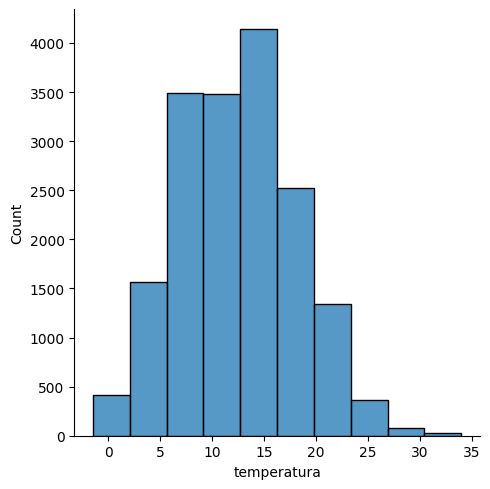

In [41]:
sns.displot(df_limpo, x = 'temperatura', bins = 10)
plt.show()

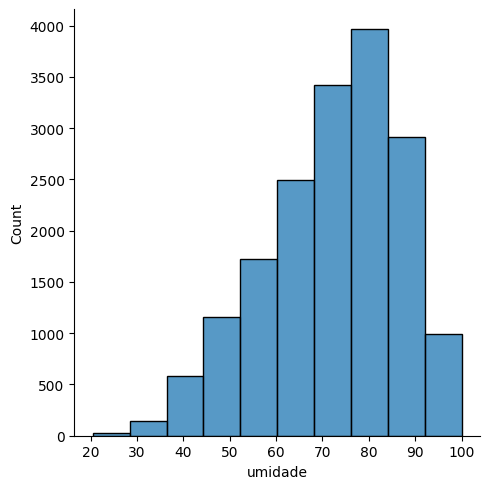

In [42]:
sns.displot(df_limpo, x = 'umidade', bins = 10)
plt.show()

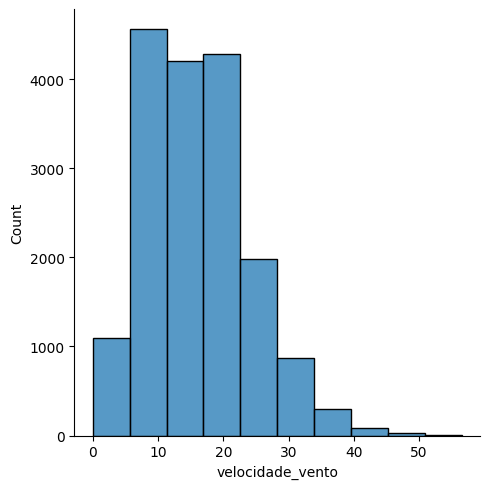

In [43]:
sns.displot(df_limpo, x = 'velocidade_vento', bins = 10)
plt.show()

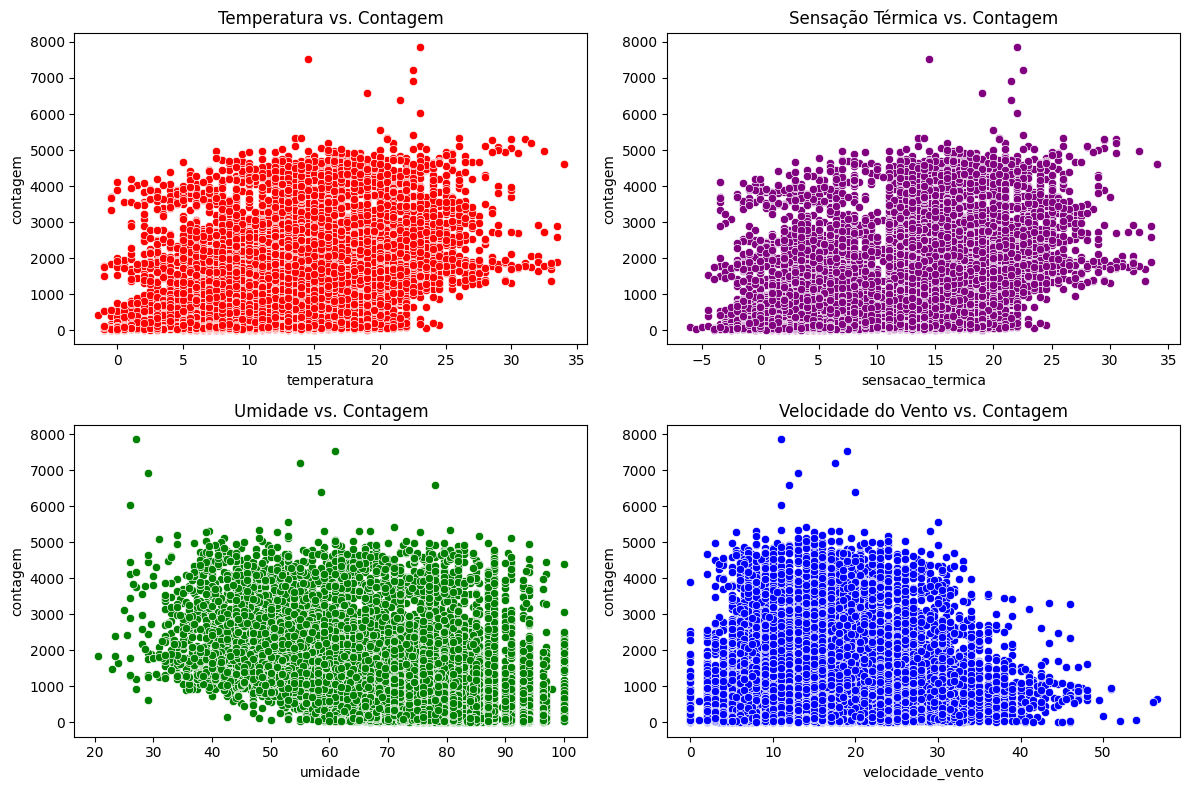

In [44]:
# Plotando gráficos que relacionam variaveis categóricas
# Cada observação é um ponto que retiramos do dataframe

# Criando os scatterplots em uma grid 2x2
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='temperatura', y='contagem', data=df_limpo, color = 'red')
plt.title('Temperatura vs. Contagem')

plt.subplot(2, 2, 2)
sns.scatterplot(x='sensacao_termica', y='contagem', data=df_limpo, color = 'purple')
plt.title('Sensação Térmica vs. Contagem')

plt.subplot(2, 2, 3)
sns.scatterplot(x='umidade', y='contagem', data=df_limpo, color = 'green')
plt.title('Umidade vs. Contagem')

plt.subplot(2, 2, 4)
sns.scatterplot(x='velocidade_vento', y='contagem', data=df_limpo, color = 'blue')
plt.title('Velocidade do Vento vs. Contagem')

plt.tight_layout()
plt.show()


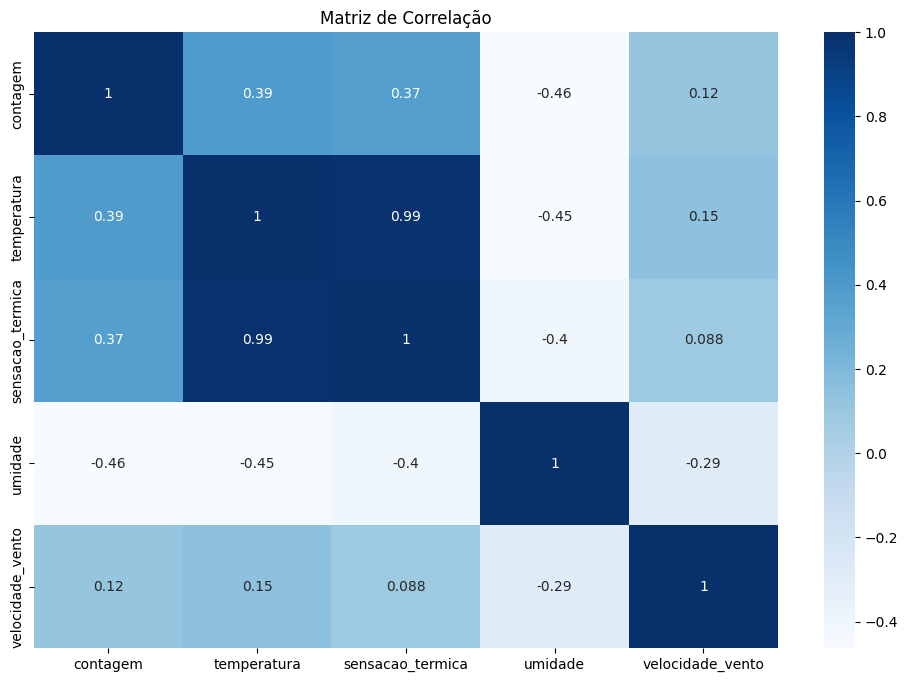

In [45]:
# Realizando estudo de correlação entre as variaveis
plt.figure(figsize=(12, 8))

sns.heatmap(df_limpo.corr(numeric_only = True), annot=True, cmap='Blues')
plt.title('Matriz de Correlação')
plt.show()


In [46]:
# Obtendo estátisticas das variáveis categóricas
df_limpo.describe(include = [object])
# Top = moda


,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [47]:
# Vendo os valores unicos de cada coluna
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Coluna:{col}')
  print(df_limpo[col].unique())
  print('='*15, '\n')

Coluna:clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna:feriado
['Não' 'Sim']

Coluna:fim_de_semana
['Sim' 'Não']

Coluna:estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



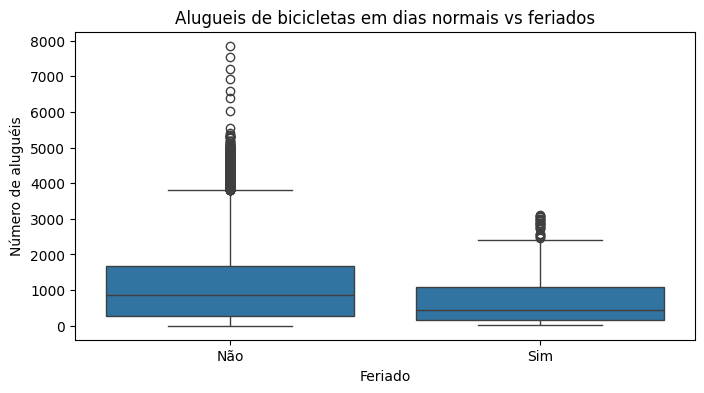

In [48]:
# Interferência dos dias da semana na locação de bicicletas
plt.figure(figsize = ( 8, 4))
sns.boxplot(x = 'feriado', y = 'contagem', data = df_limpo)
plt.title('Alugueis de bicicletas em dias normais vs feriados')
plt.xlabel('Feriado')
plt.ylabel('Número de aluguéis')
plt.show()

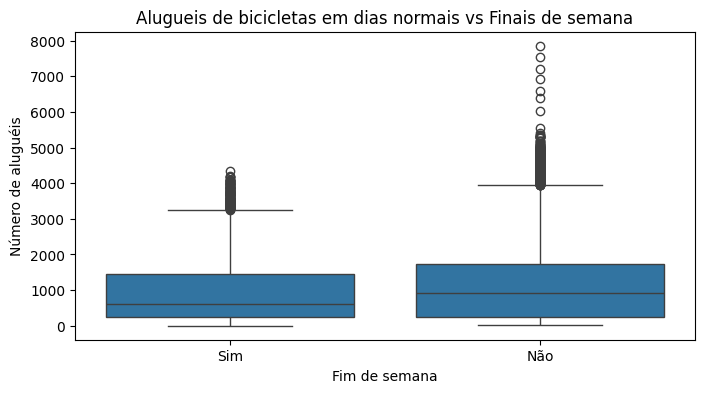

In [49]:
# Avaliando o fim de semana
plt.figure(figsize = ( 8, 4))
sns.boxplot(x = 'fim_de_semana', y = 'contagem', data = df_limpo)
plt.title('Alugueis de bicicletas em dias normais vs Finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de aluguéis')
plt.show()

In [50]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [51]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [52]:
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


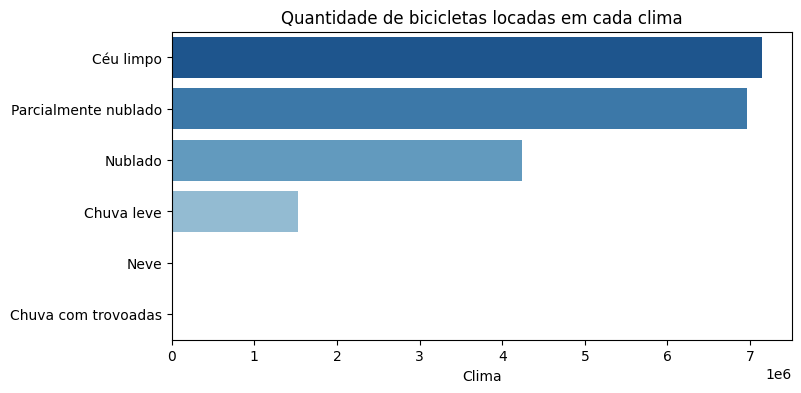

In [53]:
# Analisando clima
# contagem de quantidade de bicicletas locadas em cada clima
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by = 'contagem', ascending = False)

plt.figure(figsize = (8, 4))
sns.barplot(x = 'contagem', y = 'clima' , data = df_clima, hue = 'clima', palette = 'Blues_r', orient = 'h')
plt.title('Quantidade de bicicletas locadas em cada clima')
plt.xlabel('Clima')
plt.ylabel('')
plt.show()

In [54]:
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


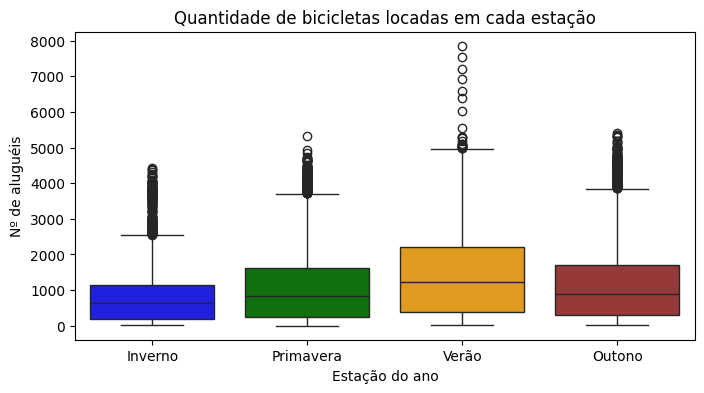

In [55]:
plt.figure(figsize = (8, 4))

paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x = 'estacao', y = 'contagem', data = df_limpo, hue = 'estacao',palette = paleta_cores)

plt.title('Quantidade de bicicletas locadas em cada estação')
plt.xlabel('Estação do ano')
plt.ylabel('Nº de aluguéis')
plt.show()

In [56]:
#Gostariamos de saber se as estações são realmente diferentes uma das outras
df_limpo.groupby('estacao')['contagem'].median()


,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [57]:
# Usando testes estátistico para saber se as estações do ano são estatísticamente diferentes
# Usando um teste que leva em conta variaveis não paramétricas

from scipy.stats import mannwhitneyu
primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

In [58]:
# Aplicando o teste
u_statistic, p_value = mannwhitneyu(primavera, outono, alternative = 'two-sided')
u_statistic, p_value

(9044682.5, 0.0004762100221646296)

In [59]:
# Analisando a parte de tempo
# Tratando os dados
df_data = df_limpo.copy()

In [60]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora']) # Transformando para o formato correto
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [61]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [62]:
df_data['mes'] = df_data['data_hora'].dt.month
df_data['dia'] = df_data['data_hora'].dt.day
df_data['horario'] = df_data['data_hora'].dt.hour

In [63]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,dia,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,4,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,4,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,4,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,4,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4,4


In [64]:
df_data['data_hora'] = df_data['data_hora'].dt.date
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,dia,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,4,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,4,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,4,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,4,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4,4


In [65]:
df_data = df_data.rename(columns = {'data_hora': 'data'})
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,dia,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,4,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,4,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,4,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,4,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4,4


In [66]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  dia               17414 non-null  int32  
 12  horario           17414 non-null  int32  
dtypes: float64(4), int32(3), int64(1), object(5)
memory usage: 2.2+ MB


In [67]:
df_data['data'] = pd.to_datetime(df_data['data']) # Tivemos que fazer isso,pois é possivel que perdamos o tipo ao fazer essas manipulaçoes

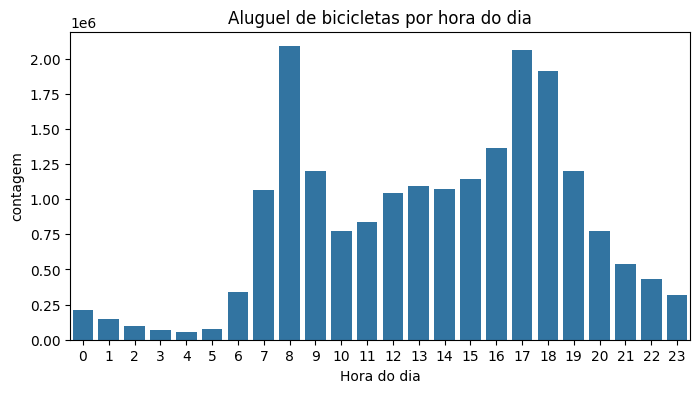

In [68]:
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='horario', y='contagem', data=df_por_hora)
plt.title('Aluguel de bicicletas por hora do dia')
plt.xlabel('Hora do dia')

plt.show()

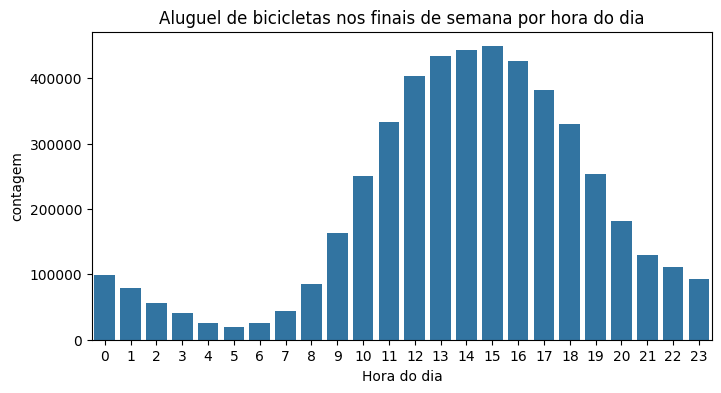

In [69]:
# Mas e nos finais de semana sera que se comporta da mesma maneira
df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']

alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Aluguel de bicicletas nos finais de semana por hora do dia')
plt.xlabel('Hora do dia')
plt.show()

In [70]:
# Data_frame com dados agrupados

df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()
df_tempo.head()

,data,contagem
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


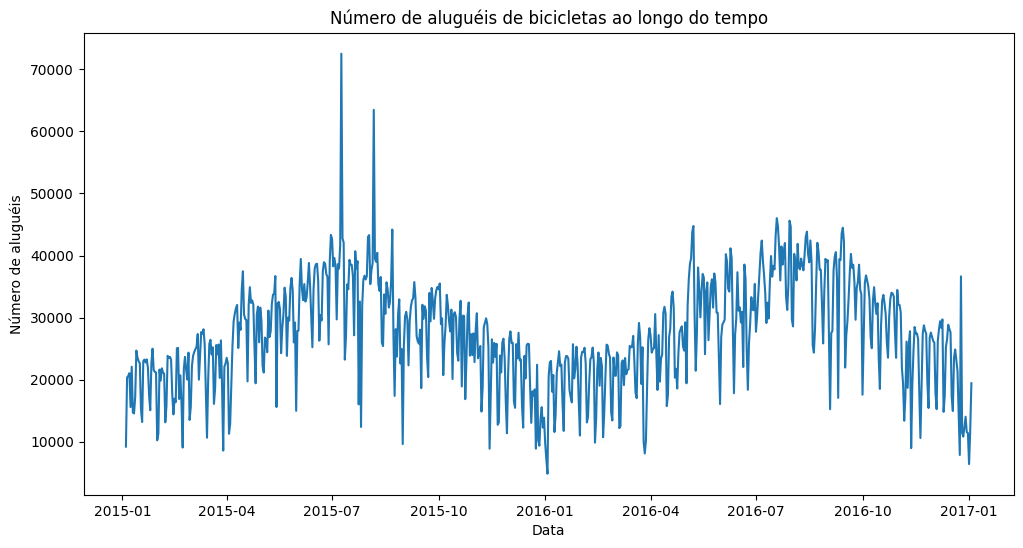

In [71]:
# Gráfico
plt.figure(figsize = (12,6))
sns.lineplot(data = df_tempo, x = 'data', y = 'contagem')
plt.title('Número de aluguéis de bicicletas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

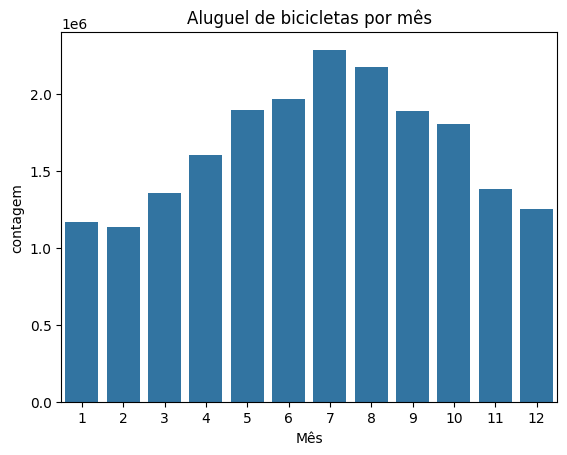

In [72]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

sns.barplot(data = alugueis_mensais, x = 'mes', y = 'contagem')
plt.title('Aluguel de bicicletas por mês')
plt.xlabel('Mês')

plt.show() # Aqui conseguimos ver sazonalidade

HOMEWORK

In [75]:
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,dia,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,4,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,4,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,4,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,4,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4,4


In [135]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()
df_tempo.head()

,data,contagem
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [136]:
df_tempo['data'] = pd.to_datetime(df_tempo['data'])
df_tempo['mes'] = df_tempo['data'].dt.to_period('M')
df_tempo

,data,contagem,mes
0,2015-01-04,9234,2015-01
1,2015-01-05,20372,2015-01
2,2015-01-06,20613,2015-01
3,2015-01-07,21064,2015-01
4,2015-01-08,15601,2015-01
...,...,...,...
725,2016-12-30,11566,2016-12
726,2016-12-31,11424,2016-12
727,2017-01-01,6421,2017-01
728,2017-01-02,11823,2017-01


In [137]:
media_aluguel_mes = df_tempo.groupby(['mes'])['contagem'].mean().reset_index()
media_aluguel_mes

,mes,contagem
0,2015-01,19522.821429
1,2015-02,19414.071429
2,2015-03,22449.483871
3,2015-04,27719.400000
4,2015-05,28884.290323
5,2015-06,34441.733333
6,2015-07,36151.193548
7,2015-08,33353.258065
8,2015-09,29749.266667
9,2015-10,27904.709677


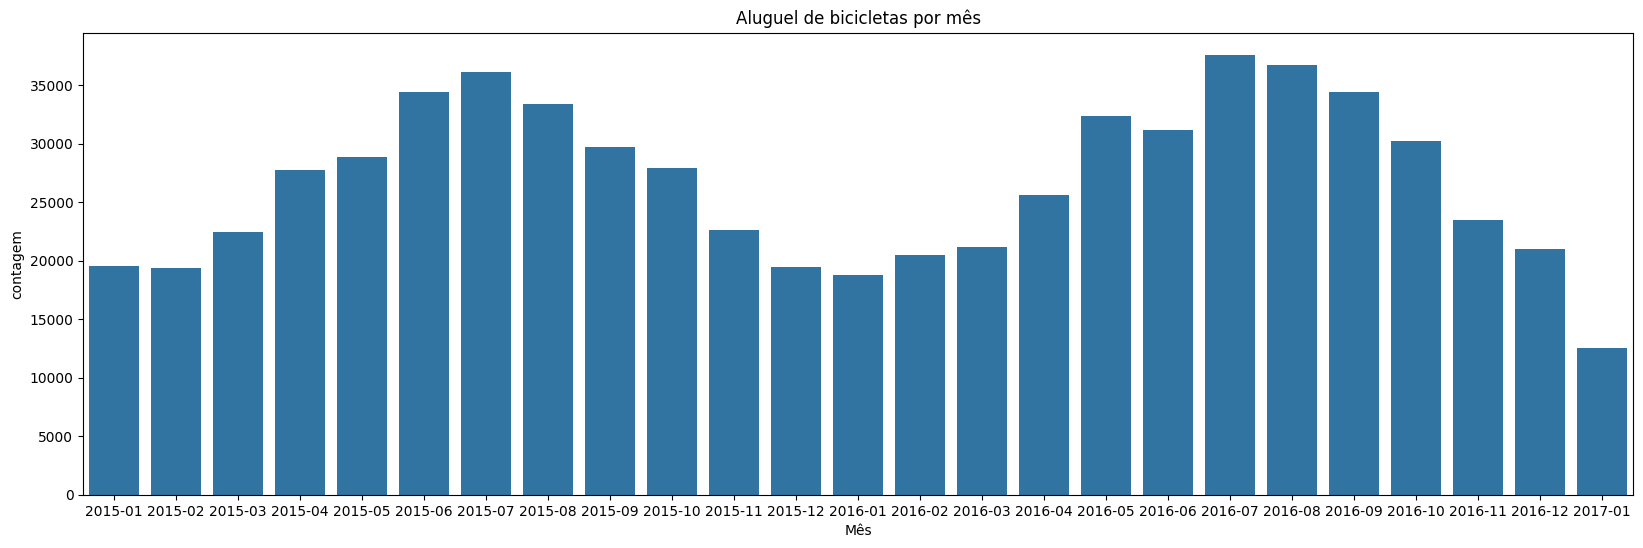

In [142]:
plt.figure(figsize = (20,6))
sns.barplot(data = media_aluguel_mes, x = 'mes', y = 'contagem')
plt.title('Aluguel de bicicletas por mês')
plt.xlabel('Mês')

plt.show()

In [144]:
# Començando a fazer previsões
from prophet import Prophet

In [145]:
df_prophet = df_data[['data', 'contagem']].rename (columns = {'data': 'ds', 'contagem': 'y'})
df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [146]:
# Agrupando as informções para um dia, pois retiramos informações de horario

df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet.head()

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [147]:
import numpy as np

np.random.seed(4587)

modelo = Prophet() # Modelo, vamos treina-lo em sequência

modelo.fit(df_prophet) # Treinando o modelo
futuro = modelo.make_future_dataframe(periods = 90, freq = 'D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/q5iervzt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/p4tymlhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36876', 'data', 'file=/tmp/tmpv74zk20u/q5iervzt.json', 'init=/tmp/tmpv74zk20u/p4tymlhj.json', 'output', 'file=/tmp/tmpv74zk20u/prophet_modelsg5f4was/prophet_model-20250218134238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:42:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:42:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


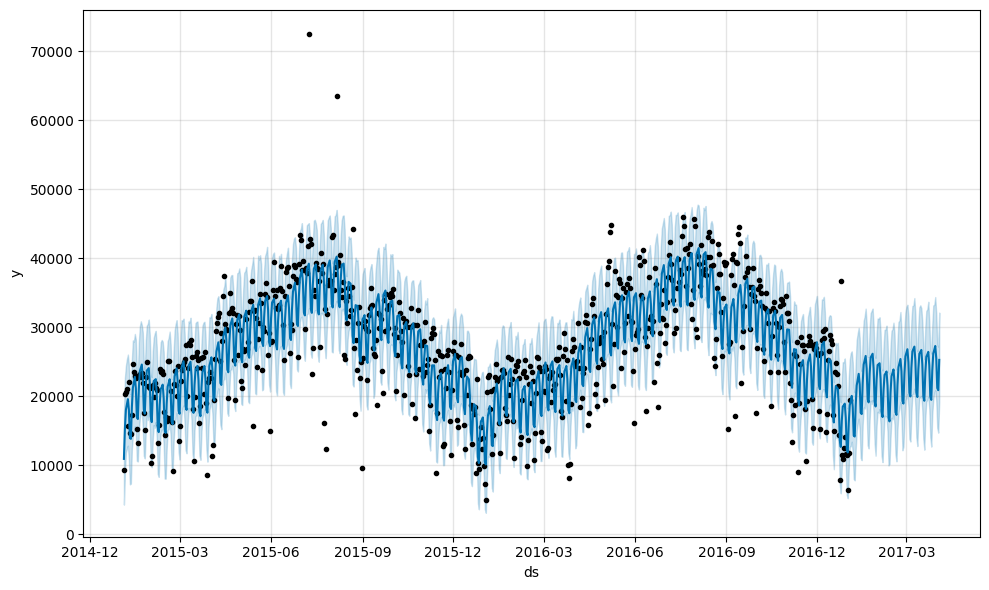

In [148]:
fig1 = modelo.plot(previsao)

In [150]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264


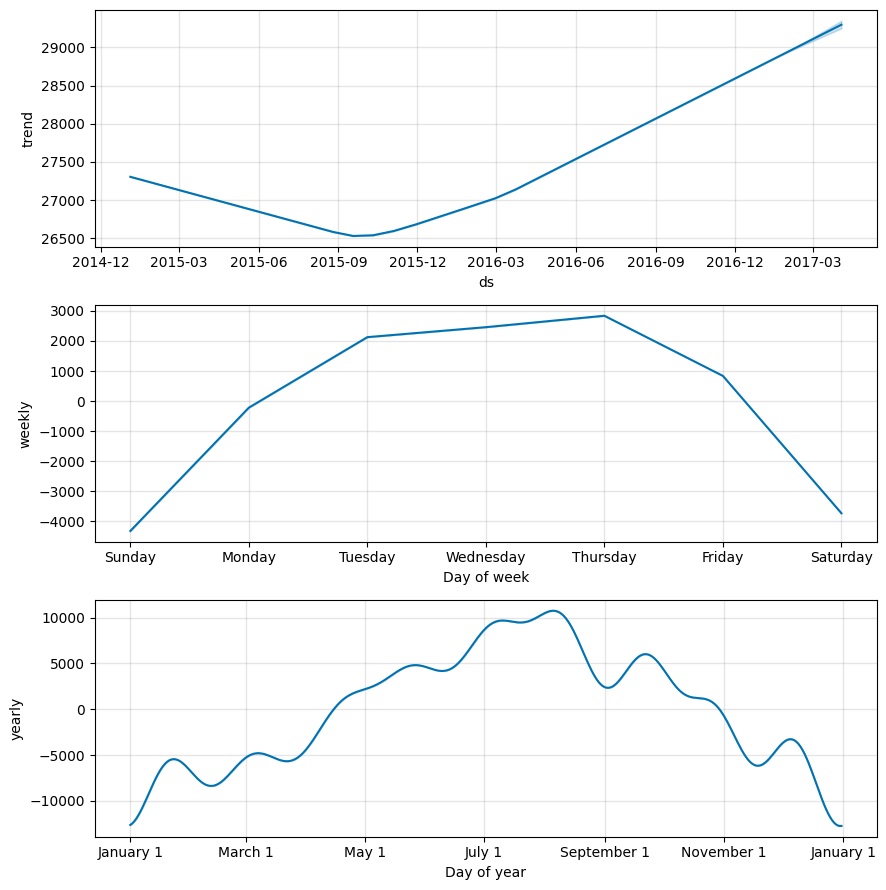

In [151]:
# Componentes preditivos  do modelo
fig2 = modelo.plot_components(previsao)

In [152]:
df_prophet.shape

(730, 2)

In [156]:
 # Selecionando os dados de treino

 df_treino = pd.DataFrame()

 df_treino['ds'] = df_prophet['ds'][:584]
 df_treino['y'] = df_prophet['y'][:584]

In [155]:
# Selecionando dos dados de testo

df_teste = pd.DataFrame()

df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [157]:
np.random.seed(4587)

modelo =Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods = 150, freq = 'D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/saxogx_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/z6fme44z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34284', 'data', 'file=/tmp/tmpv74zk20u/saxogx_q.json', 'init=/tmp/tmpv74zk20u/z6fme44z.json', 'output', 'file=/tmp/tmpv74zk20u/prophet_modelmfwp2tv_/prophet_model-20250218135706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:57:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


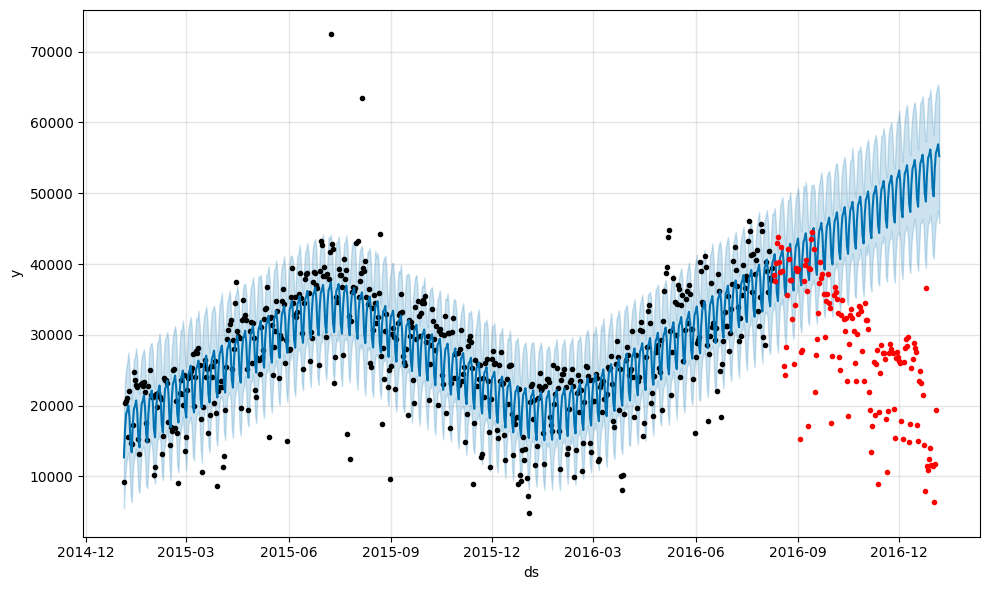

In [158]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r') # Os modelo de treino não pegaram o periodo total e não conseguil visualizar a sazonalidade


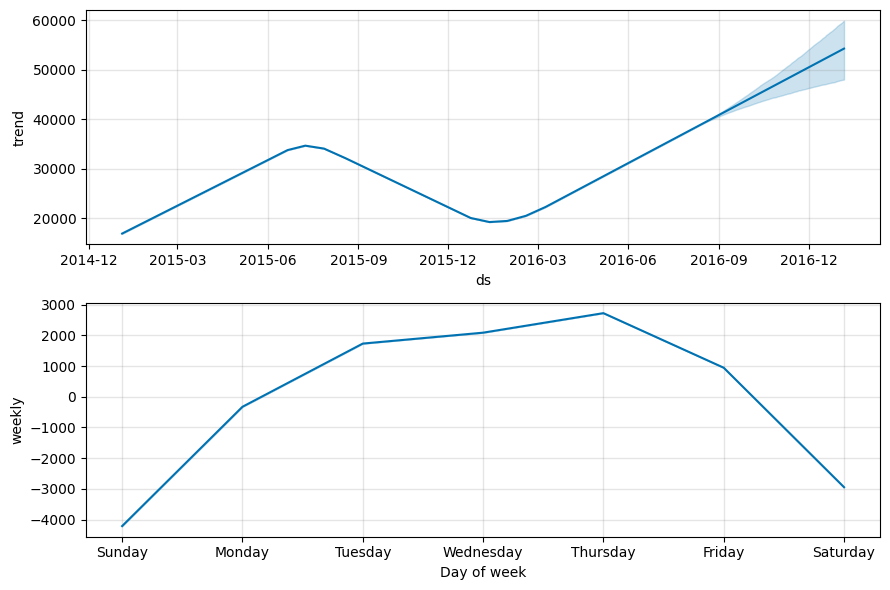

In [159]:
fig2 = modelo.plot_components(previsao)

In [161]:
# Usando umaa métrica para entender a performance do modelo
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste,  on = 'ds')
df_comparacao.head()

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848


In [165]:
# Usando a métrica do erro quadrático médio e retirar a raiz quadrada
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE: {rmse}')

MSE:466132050.6184666, RMSE: 21590.09149166503


In [166]:
# Melhorando o modelo

np.random.seed(4587)

modelo = Prophet(yearly_seasonality = True) # Melhoramos um hiperparametro do modelo
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods = 150, freq = 'D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/l3nedkbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/letk5r01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68074', 'data', 'file=/tmp/tmpv74zk20u/l3nedkbg.json', 'init=/tmp/tmpv74zk20u/letk5r01.json', 'output', 'file=/tmp/tmpv74zk20u/prophet_modelwadpsl8y/prophet_model-20250218144550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


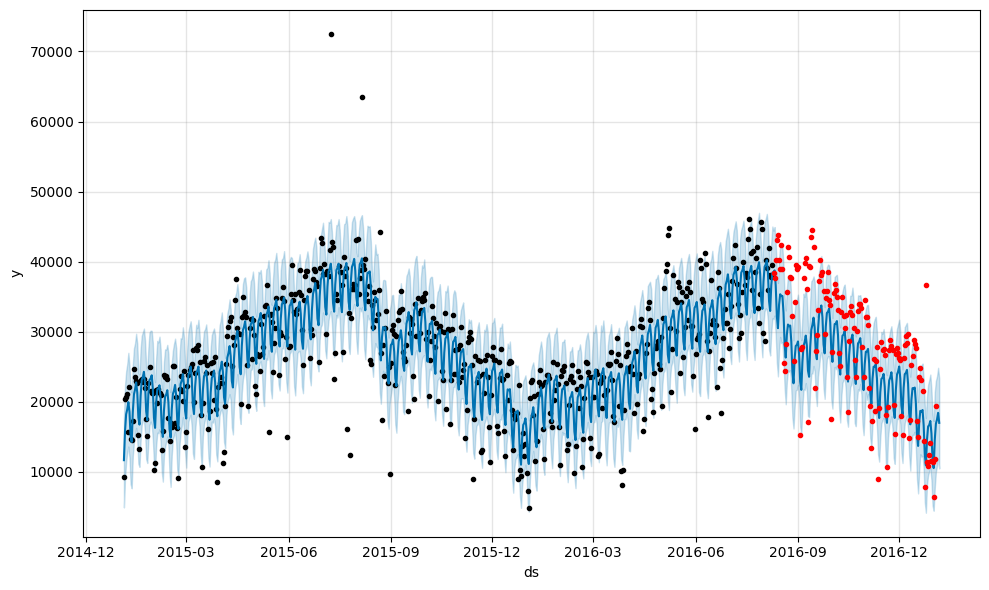

In [168]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

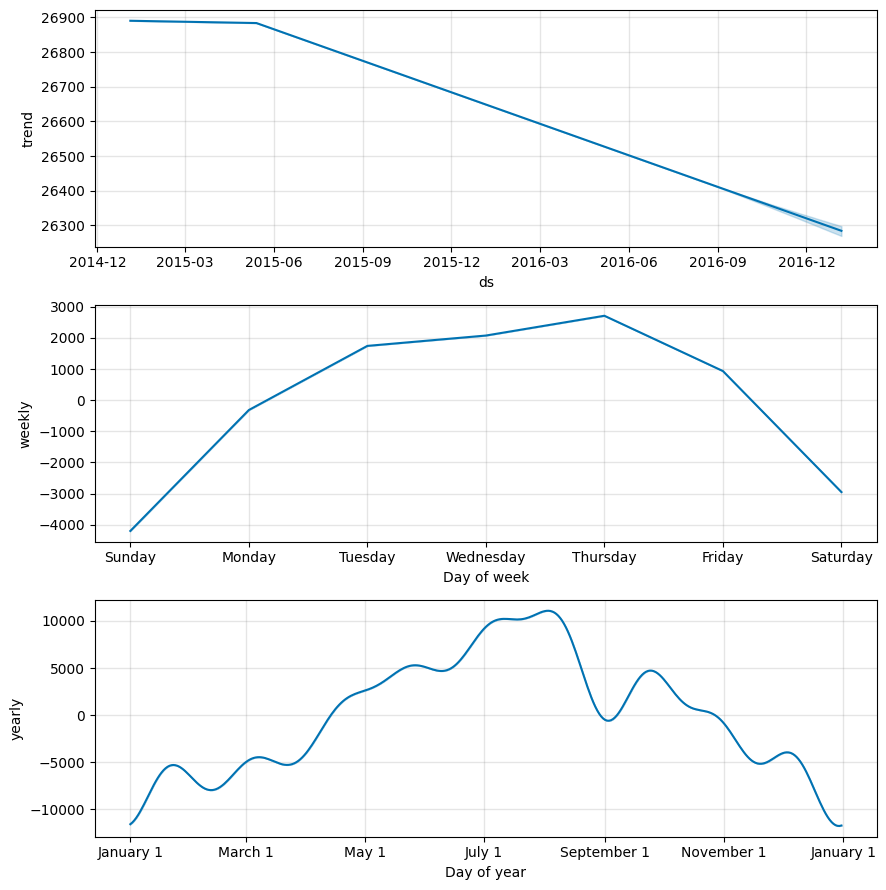

In [169]:
fig2_= modelo.plot_components(previsao)

In [170]:
# Avaliando o modelo novamente
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste,  on = 'ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [171]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE: {rmse}')

MSE:38623883.499975376, RMSE: 6214.8116222437


In [172]:
# Tratando outliers
# Removendo valores fora do intervalo de confiança

df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [174]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods =0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/dgzycnqs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/yonn7a1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84638', 'data', 'file=/tmp/tmpv74zk20u/dgzycnqs.json', 'init=/tmp/tmpv74zk20u/yonn7a1n.json', 'output', 'file=/tmp/tmpv74zk20u/prophet_modelo6ghvvmz/prophet_model-20250218150850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [175]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [177]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [185]:
df_treino = pd.DataFrame()

df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [186]:
df_teste = pd.DataFrame()

df_teste['ds'] = sem_outliers['ds'][:505]
df_teste['y'] = sem_outliers['y'][:505]

In [191]:
# Treinando o nosso novo modelo
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/754h7mt4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/3ydjpq3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62660', 'data', 'file=/tmp/tmpv74zk20u/754h7mt4.json', 'init=/tmp/tmpv74zk20u/3ydjpq3a.json', 'output', 'file=/tmp/tmpv74zk20u/prophet_modely7seof3t/prophet_model-20250218152723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:27:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:27:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


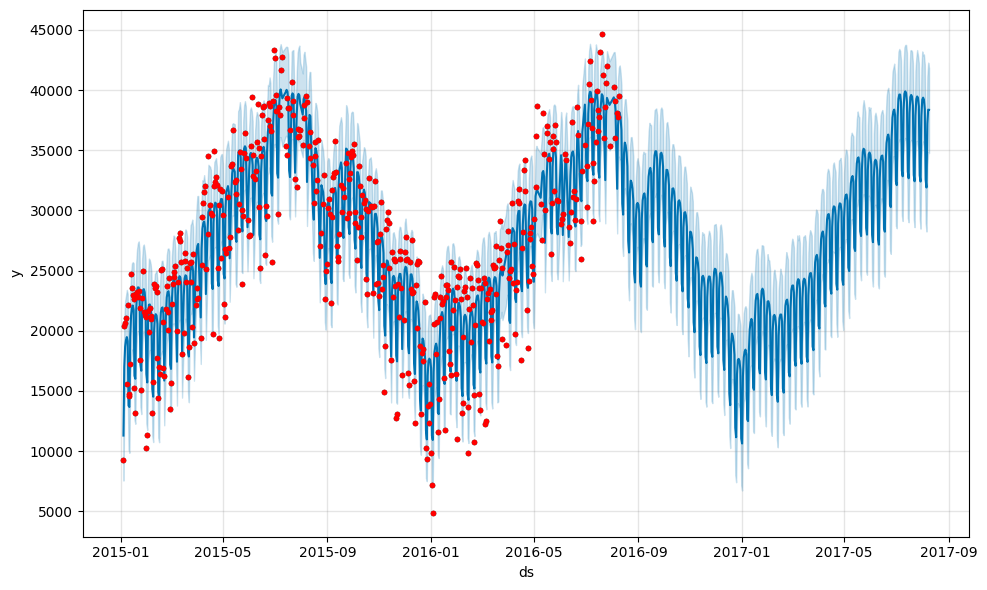

In [192]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [193]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao, df_teste,  on = 'ds')
df_comparacao

,ds,yhat,y
0,2015-01-04,11286.019845,9234
1,2015-01-05,17004.784718,20372
2,2015-01-06,18677.619006,20613
3,2015-01-07,19226.222558,21064
4,2015-01-08,19471.681585,15601
...,...,...,...
500,2016-08-04,39193.640901,39082
501,2016-08-05,38369.588815,35991
502,2016-08-07,31791.950170,38076
503,2016-08-08,37043.371136,37769


In [194]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE:{mse}, RMSE: {rmse}')

MSE:8432246.672157908, RMSE: 2903.8330999143027


In [196]:
# fazendo o previsões mais longas

np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)

futuro = modelo_sem_outliers.make_future_dataframe(periods = 365, freq = 'D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/njg91vfg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv74zk20u/j403xy_4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63157', 'data', 'file=/tmp/tmpv74zk20u/njg91vfg.json', 'init=/tmp/tmpv74zk20u/j403xy_4.json', 'output', 'file=/tmp/tmpv74zk20u/prophet_model84qftlsz/prophet_model-20250218153032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [197]:
from prophet.plot import plot_plotly


In [198]:
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()